In [9]:
import pandas as pd
df = pd.read_excel('heartRisk.xlsx')
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [2]:
df1 = pd.DataFrame(df, columns = ['Systolic', 'Cholesterol'])
print(df1.head())

   Systolic  Cholesterol
0       101          181
1       167          155
2       181          147
3       145          166
4       134          199


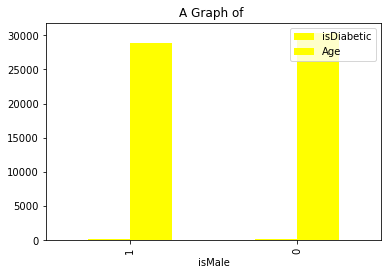

In [3]:
df2 = df[['isMale','isDiabetic','Age']]
df2_group = df2.groupby('isMale')
summation = df2_group.sum()

data = pd.DataFrame(data = summation)
result = data.sort_values(by=['Age'], ascending = True)
myplot = result.plot(kind = 'bar', rot = 90, color = "yellow", title = "A Graph of ", legend = 'lower left')


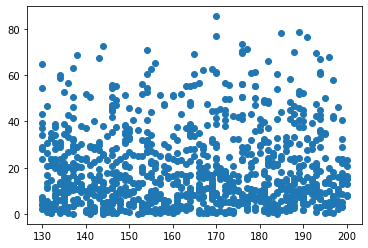

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

risk_x = df[['Cholesterol']]
risk_y = df[['Risk']]
plt.scatter(risk_x, risk_y)

     Cholesterol
655          162
333          163
164          193
588          146
246          190
..           ...
239          176
456          186
1            155
388          150
109          131

[800 rows x 1 columns]


     Risk
655  51.9
333   2.2
164  17.0
588  27.6
246   4.2
..    ...
239  50.5
456   2.5
1    30.1
388  35.5
109   3.1

[800 rows x 1 columns]


     Cholesterol
422          199
157          186
166          174
507          137
262          164
..           ...
253          146
177          166
144          170
717          153
997          179

[200 rows x 1 columns]


The predicted Risk value for Cholesterol = 60 is:  [[15.22009906]]
Coefficients: 
 [[0.0408427]]


Mean squared error:  294.009492724774
Coefficient of determination:  0.0015804107600088102


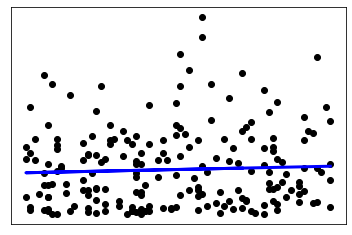

In [5]:
X_train,X_test,y_train,y_test=train_test_split(risk_x, risk_y,test_size=0.2)
print(X_train)
print("\n")
print(y_train)
print("\n")
print(X_test)
 
regr = LinearRegression()
 

regr.fit(X_train, y_train)
 

y_pred = regr.predict(X_test)
y_pred2 = regr.predict([[60]])
print("\n")
print("The predicted Risk value for Cholesterol = 60 is: ", y_pred2)
 

print('Coefficients: \n', regr.coef_)
print("\n")
 
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))
 
 # Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
 
plt.xticks(())
plt.yticks(())
 
plt.show()



In [6]:
import statsmodels.api as sm

risk1_x = df[['isMale', 'isBlack' , 'isSmoker', 'isDiabetic', 'isHypertensive', 'Age', 'Systolic', 'Cholesterol','HDL']]
risk1_y = df[['Risk']]
 
#Split the dataset into training and testing sets (80%:20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(risk1_x, risk1_y, test_size=0.2)
print(X_train1)
print("\n")
print(y_train1)
print("\n")
print(X_test1)
 
#Create linear regression object
regr = LinearRegression()
 
# Train the model using the training sets 
regr.fit(X_train1, y_train1)
 
# Make predictions using the testing set
y_pred1 = regr.predict(X_test1)
 
pisMale = input("Enter value for isMale:")
pisBlack = input("Enter value for isBlack:")
pisSmoker = input("Enter value for isSmoker:")
pisDiabetic = input("Enter value for isDiabetic:")
pisHypertensive = input("Enter value for isHypertensive:")
pAge = input("Enter value for Age:")
pSystolic = input("Enter value for Systolic:")
pCholesterol = input("Enter value for Cholesterol:")
pHDL = input("Enter value for HDL:")
print("\n")
print ('Predicted Risk value: ', regr.predict([[pisMale, pisBlack, pisSmoker, pisDiabetic, pisHypertensive, pAge, pSystolic, 
                                             pCholesterol, pHDL]]))
print("\n")
 
# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")
 
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test1, y_pred1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test1, y_pred1))
 
#Use statsmodel for model summary
risk1_x = sm.add_constant(risk1_x)
model = sm.OLS(risk1_y, risk1_x).fit()
predictions = model.predict(risk1_x)
print_model = model.summary()
print(print_model)


     isMale  isBlack  isSmoker  isDiabetic  isHypertensive  Age  Systolic  \
985       1        0         0           1               0   62       177   
46        0        1         1           0               0   57       161   
274       1        1         0           0               1   68        99   
582       0        1         1           1               1   63       153   
860       0        1         0           0               0   57       159   
..      ...      ...       ...         ...             ...  ...       ...   
628       0        1         0           1               1   42       174   
881       0        0         0           0               1   52       192   
317       1        1         1           0               1   52       112   
441       1        0         0           1               0   51       109   
13        1        1         1           0               1   61       129   

     Cholesterol  HDL  
985          145   82  
46           198   30  
274

C:\Users\DEAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)




Predicted Risk value:  [[-4.22915885]]


Coefficients: 
 [[ 4.68730378  2.73950789  8.69180685 10.53772683  5.14783117  0.90217955
   0.2032803   0.0624525  -0.09204766]]


Mean squared error:  74.37695944504523
Coefficient of determination:  0.7842318133727513
                            OLS Regression Results                            
Dep. Variable:                   Risk   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     429.1
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:19:08   Log-Likelihood:                -3459.5
No. Observations:                1000   AIC:                             6939.
Df Residuals:                     990   BIC:                             6988.
Df Model:                           9                                         
Covariance Type:         

In [7]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

print(df.describe())
print("\n")


           isMale      isBlack     isSmoker   isDiabetic  isHypertensive  \
count  1000.00000  1000.000000  1000.000000  1000.000000     1000.000000   
mean      0.49000     0.530000     0.516000     0.522000        0.495000   
std       0.50015     0.499349     0.499994     0.499766        0.500225   
min       0.00000     0.000000     0.000000     0.000000        0.000000   
25%       0.00000     0.000000     0.000000     0.000000        0.000000   
50%       0.00000     1.000000     1.000000     1.000000        0.000000   
75%       1.00000     1.000000     1.000000     1.000000        1.000000   
max       1.00000     1.000000     1.000000     1.000000        1.000000   

               Age     Systolic  Cholesterol          HDL         Risk  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean     59.107000   144.249000   164.043000    59.603000    19.667000  
std      11.536492    31.774528    20.329891    23.863505    17.043941  
min      40.000000    9

In [18]:
feature_cols =  ['isMale', 'isBlack' , 'isSmoker', 'isDiabetic', 'isHypertensive', 'Age', 'Systolic', 'Cholesterol','HDL']
risk2_x = df[feature_cols] 
risk2_y = df['Risk'] 


from sklearn import preprocessing
from sklearn import utils


lab_enc = preprocessing.LabelEncoder()
risk2_y = lab_enc.fit_transform(risk2_y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(risk2_x, risk2_y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train2, y_train2)
y_pred = clf.predict(X_test2)


print("\n")
print("Accuracy for 70% training set and 30% test set:",
          metrics.accuracy_score(y_test2, y_pred))

visMale = input("Enter value for isMale:")
visBlack = input("Enter value for isBlack:")
visSmoker = input("Enter value for isSmoker:")
visDiabetic = input("Enter value for isDiabetic:")
visHypertensive = input("Enter value for isHypertensive:")
vAge = input("Enter value for Age:")
vSystolic = input("Enter value for Systolic:")
vCholesterol = input("Enter value for Cholesterol:")
vHDL = input("Enter value for HDL:")
print ('Predicted Risk value: ', clf.predict([[visMale, visBlack, visSmoker, visDiabetic, visHypertensive, vAge, vSystolic, 
                                             vCholesterol, vHDL]]))

C:\Users\DEAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)




Accuracy for 70% training set and 30% test set: 0.01
Enter value for isMale:1
Enter value for isBlack:1
Enter value for isSmoker:0
Enter value for isDiabetic:0
Enter value for isHypertensive:1
Enter value for Age:45
Enter value for Systolic:123
Enter value for Cholesterol:123
Enter value for HDL:45
Predicted Risk value:  [208]


In [21]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('Risk', axis='columns'))
scaled_X1 = pd.DataFrame(scaled_X)
scaled_X1

,0,1,2,3,4,5,6,7,8
0,1.0,1.0,0.0,1.0,1.0,0.230769,0.100000,0.728571,0.1500
1,0.0,0.0,0.0,1.0,1.0,0.743590,0.700000,0.357143,0.4875
2,0.0,1.0,1.0,1.0,1.0,0.256410,0.827273,0.242857,0.4875
3,1.0,1.0,1.0,1.0,0.0,0.051282,0.500000,0.514286,0.3250
4,0.0,0.0,1.0,0.0,1.0,0.666667,0.400000,0.985714,0.5375
...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,1.0,1.0,1.0,0.051282,0.181818,0.642857,0.5875
996,0.0,1.0,0.0,1.0,0.0,0.897436,0.300000,0.000000,0.4500
997,1.0,1.0,1.0,0.0,1.0,0.923077,0.800000,0.700000,0.1250
998,0.0,1.0,1.0,1.0,0.0,0.641026,0.445455,0.557143,0.5750


In [22]:
scaled_y = sy.fit_transform(df['Risk'].values.reshape(df.shape[0],1))

scaled_y1 = pd.DataFrame(scaled_y)
scaled_y1

,0
0,0.128957
1,0.351700
2,0.439625
3,0.153576
4,0.175850
...,...
995,0.044549
996,0.279015
997,0.717468
998,0.377491


## Batch Gradient Descent

In [23]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost  = np.mean(np.square(y_true - y_predicted))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.13622   , 0.11525734, 0.18675859, 0.20571822, 0.13999538,
        0.49127864, 0.42727911, 0.31538332, 0.20502563]),
 -0.9041257228093981,
 0.03315477866950137)

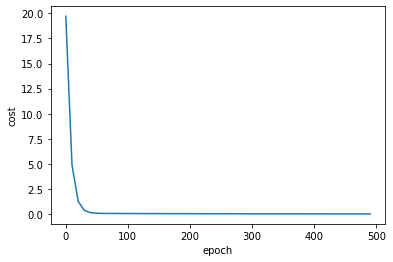

In [24]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [38]:
def predict(isMale, isBlack , isSmoker, isDiabetic, isHypertensive, Age, Systolic, Cholesterol, HDL, w, b):
    scaled_X = sx.transform([[isMale, isBlack , isSmoker, isDiabetic, isHypertensive, Age, Systolic, Cholesterol, HDL]])[0]
    
    scaled_Risk = w[0]*scaled_X[0] + w[1]*scaled_X[1] + w[2]*scaled_X[2] + w[3]*scaled_X[3] + w[4]*scaled_X[4] + w[5]*scaled_X[5] + w[6]*scaled_X[6] + w[7]*scaled_X[7] + w[8]*scaled_X[8] + b
    return sy.inverse_transform([[scaled_Risk]])[0][0]

predict(1,1,1,0,1,72,167,142,92,w,b)

52.550130720400425

In [37]:
predict(0,0,0,1,1,71,160,151,73,w,b)

28.62779874097199

In [40]:
predict(1,1,1,1,1,57,186,165,88,w,b)

68.2404106964264

## Stochastic Gradient Descent

In [41]:
import random

def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.65948703, 0.63672732, 0.64639168, 0.64333383, 0.65736138,
        0.68819418, 0.68432924, 0.68733621, 0.67489854]),
 -0.619050166272831,
 4.913302861375267)

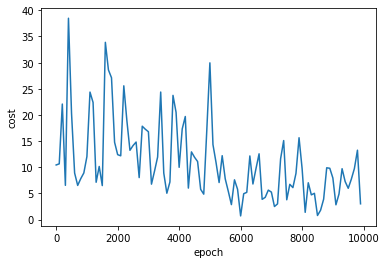

In [42]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [43]:
predict(1,1,1,1,1,57,186,165,88,w_sgd, b_sgd)

378.72945306674745

In [45]:
predict(0,0,0,1,1,71,160,151,73,w_sgd,b_sgd)

197.78058153972717